# Get preliminary results

In [33]:
import subprocess

In [34]:
cancerTypes = ['brca', 'ccrcc', 'endometrial', 'colon', 'ovarian', 'luad']
algorithms = ['cibersort', 'epic', 'xcell', 'mcpcounter']
sigMatrices = ['LM22', 'LM7c', 'LM9', 'PBMC']

In [11]:
for cancer in cancerTypes:
    for algo in algorithms:
        for sig in sigMatrices:
            subprocess.run(['cwltool', 'eval-' + algo + '-with-correlation.cwl', 
                           '--cancerType', cancer, '--signature', '../signature_matrices/' + sig + '.txt'])
            subprocess.run(['mv', 'corr.tsv', cancer + '-' + algo + '-' + sig + '-corr.tsv'])

In [ ]:
for cancer in cancerTypes:
    for algo in algorithms:
        for sig in sigMatrices:
            subprocess.run(['cwltool', 'eval-' + algo + '-with-correlationXcelltypes.cwl', 
                           '--cancerType', cancer, '--signature', '../signature_matrices/' + sig + '.txt'])
            subprocess.run(['mv', 'corrXcelltypes.tsv', cancer + '-' + algo + '-' + sig + '-corrXcelltypes.tsv'])

## generate missing results

In [35]:
    for cancer in cancerTypes:
        algo = 'cibersort'
        for sig in sigMatrices:
            subprocess.run(['cwltool', 'eval-' + algo + '-with-correlation.cwl', 
                           '--cancerType', cancer, '--signature', '../signature_matrices/' + sig + '.txt'])
            subprocess.run(['mv', 'corr.tsv', cancer + '-' + algo + '-' + sig + '-corr.tsv'])

In [36]:
    for cancer in cancerTypes:
        algo = 'cibersort'
        for sig in sigMatrices:
            subprocess.run(['cwltool', 'eval-' + algo + '-with-correlationXcelltypes.cwl', 
                           '--cancerType', cancer, '--signature', '../signature_matrices/' + sig + '.txt'])
            subprocess.run(['mv', 'corrXcelltypes.tsv', cancer + '-' + algo + '-' + sig + '-corrXcelltypes.tsv'])

# Plot results

In [37]:
#%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.7)
plt.rcParams['figure.figsize'] = (20.0, 30.0)
plt.rcParams['font.family'] = "sans-serif"

In [38]:
cancerTypes = ['ccrcc', 'endometrial', 'colon', 'brca']
algorithms = ['cibersort', 'epic', 'xcell', 'mcpcounter']
sigMatrices = ['LM22', 'LM7c', 'LM9', 'PBMC']

cibersort does not work with brca using LM9


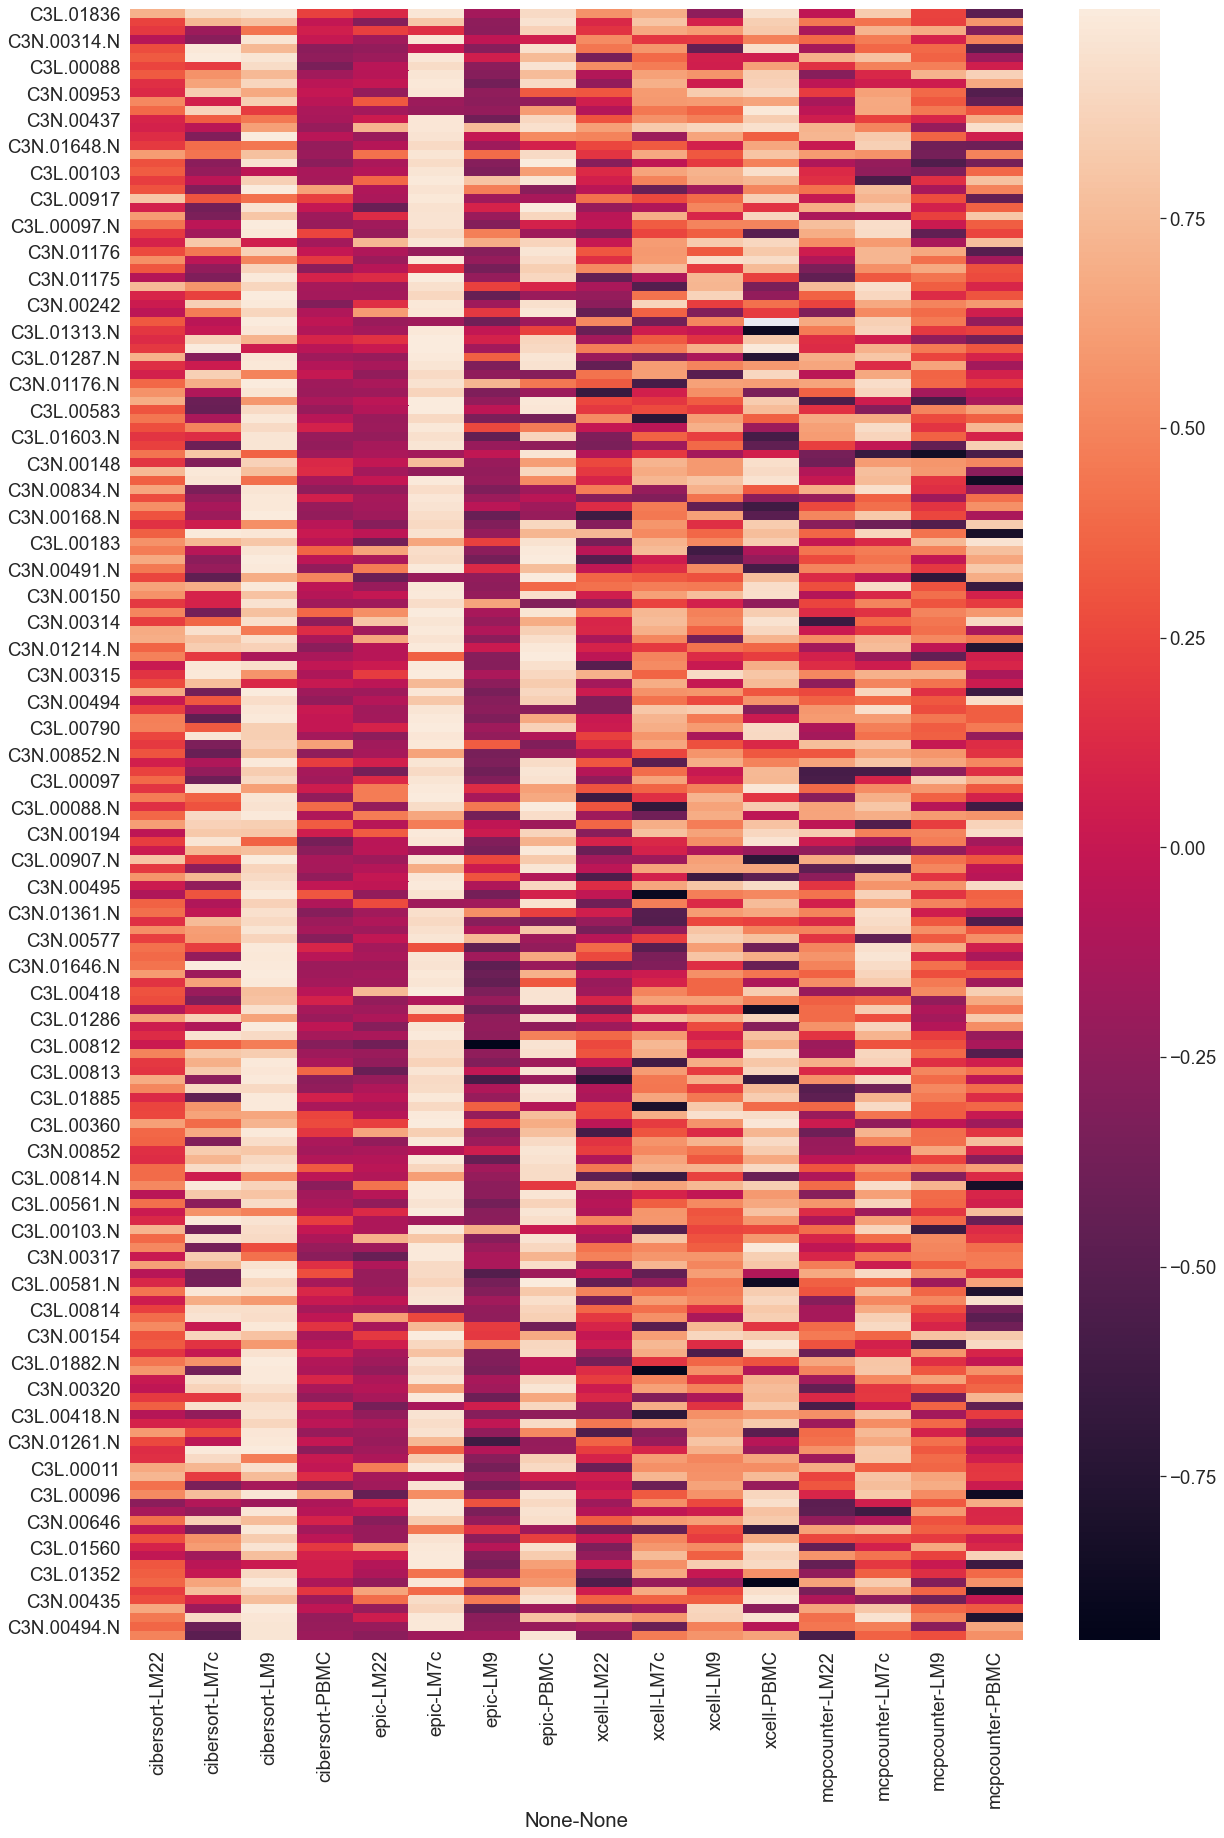

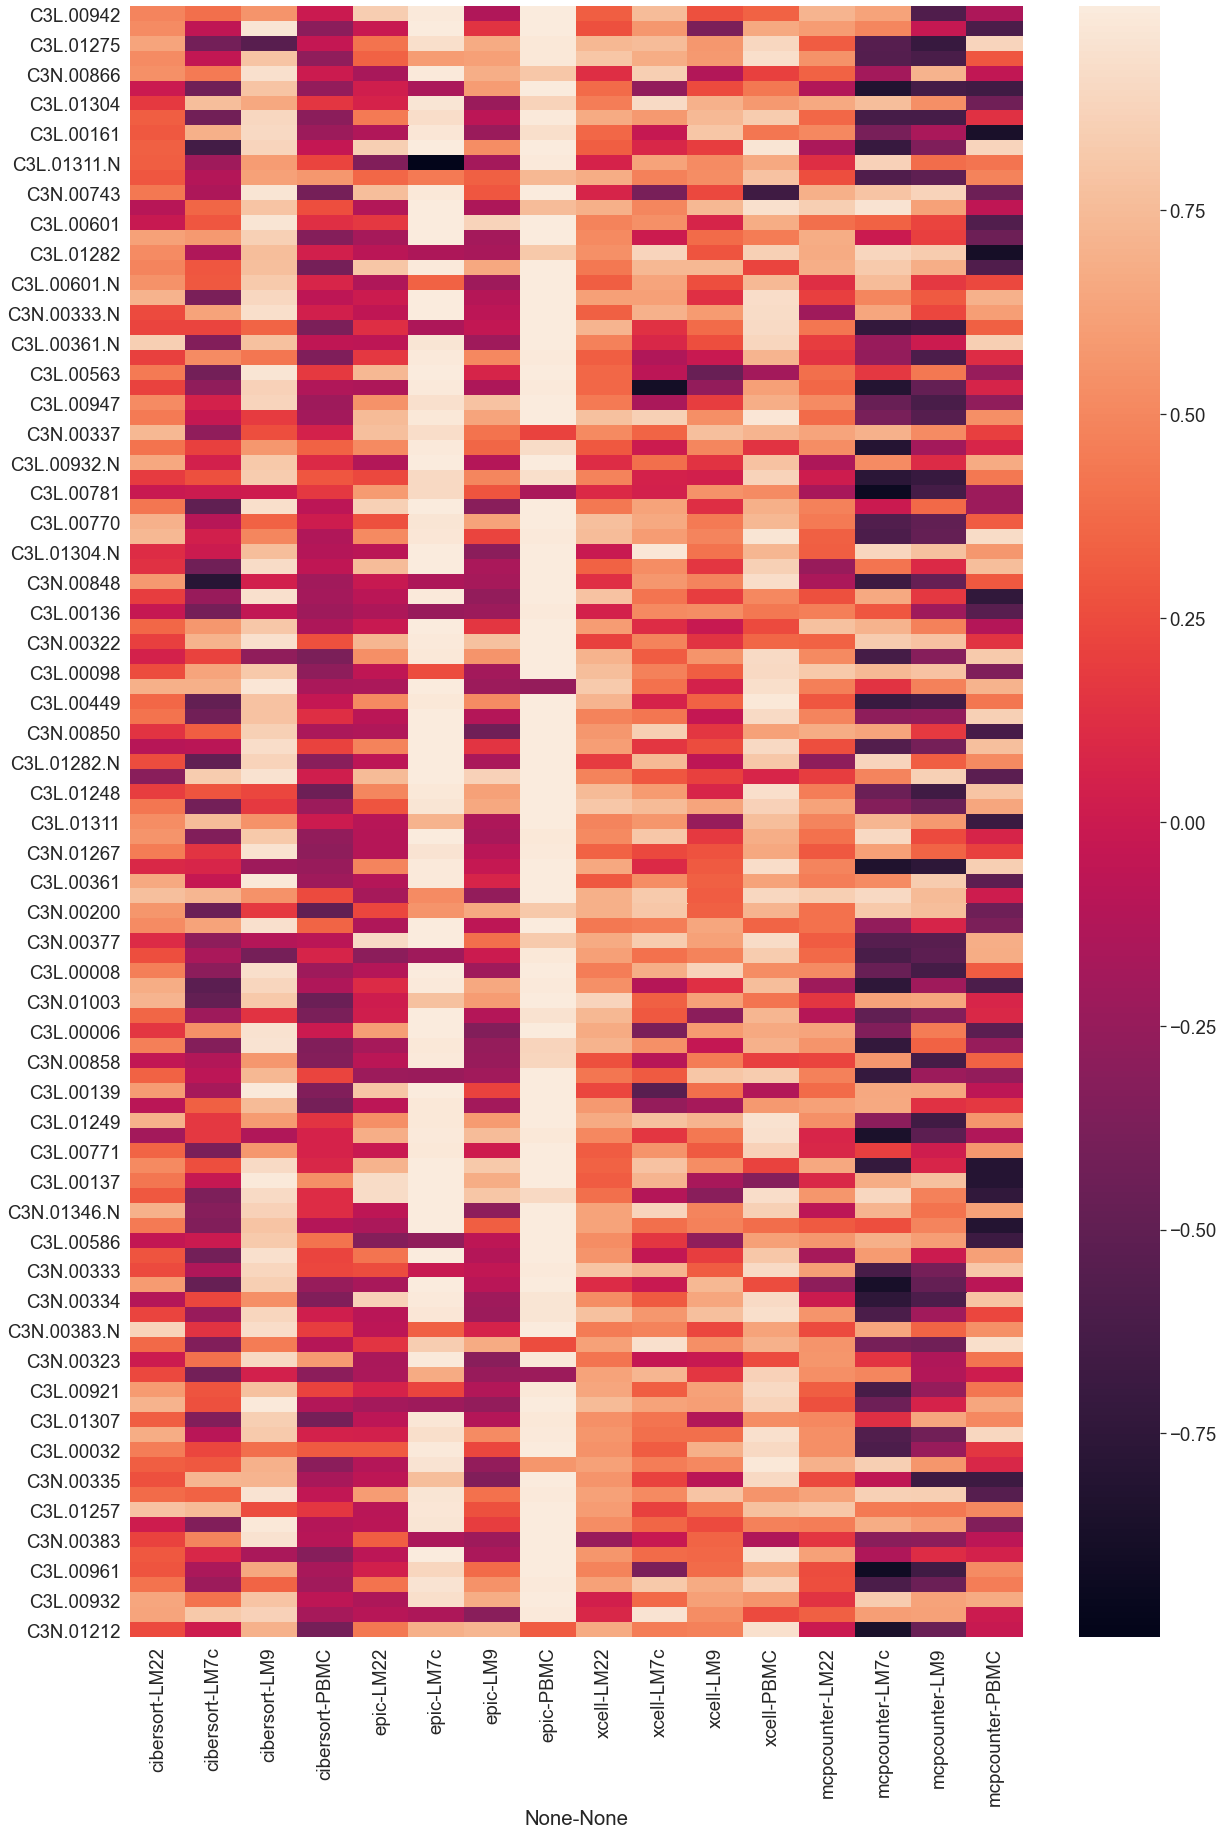

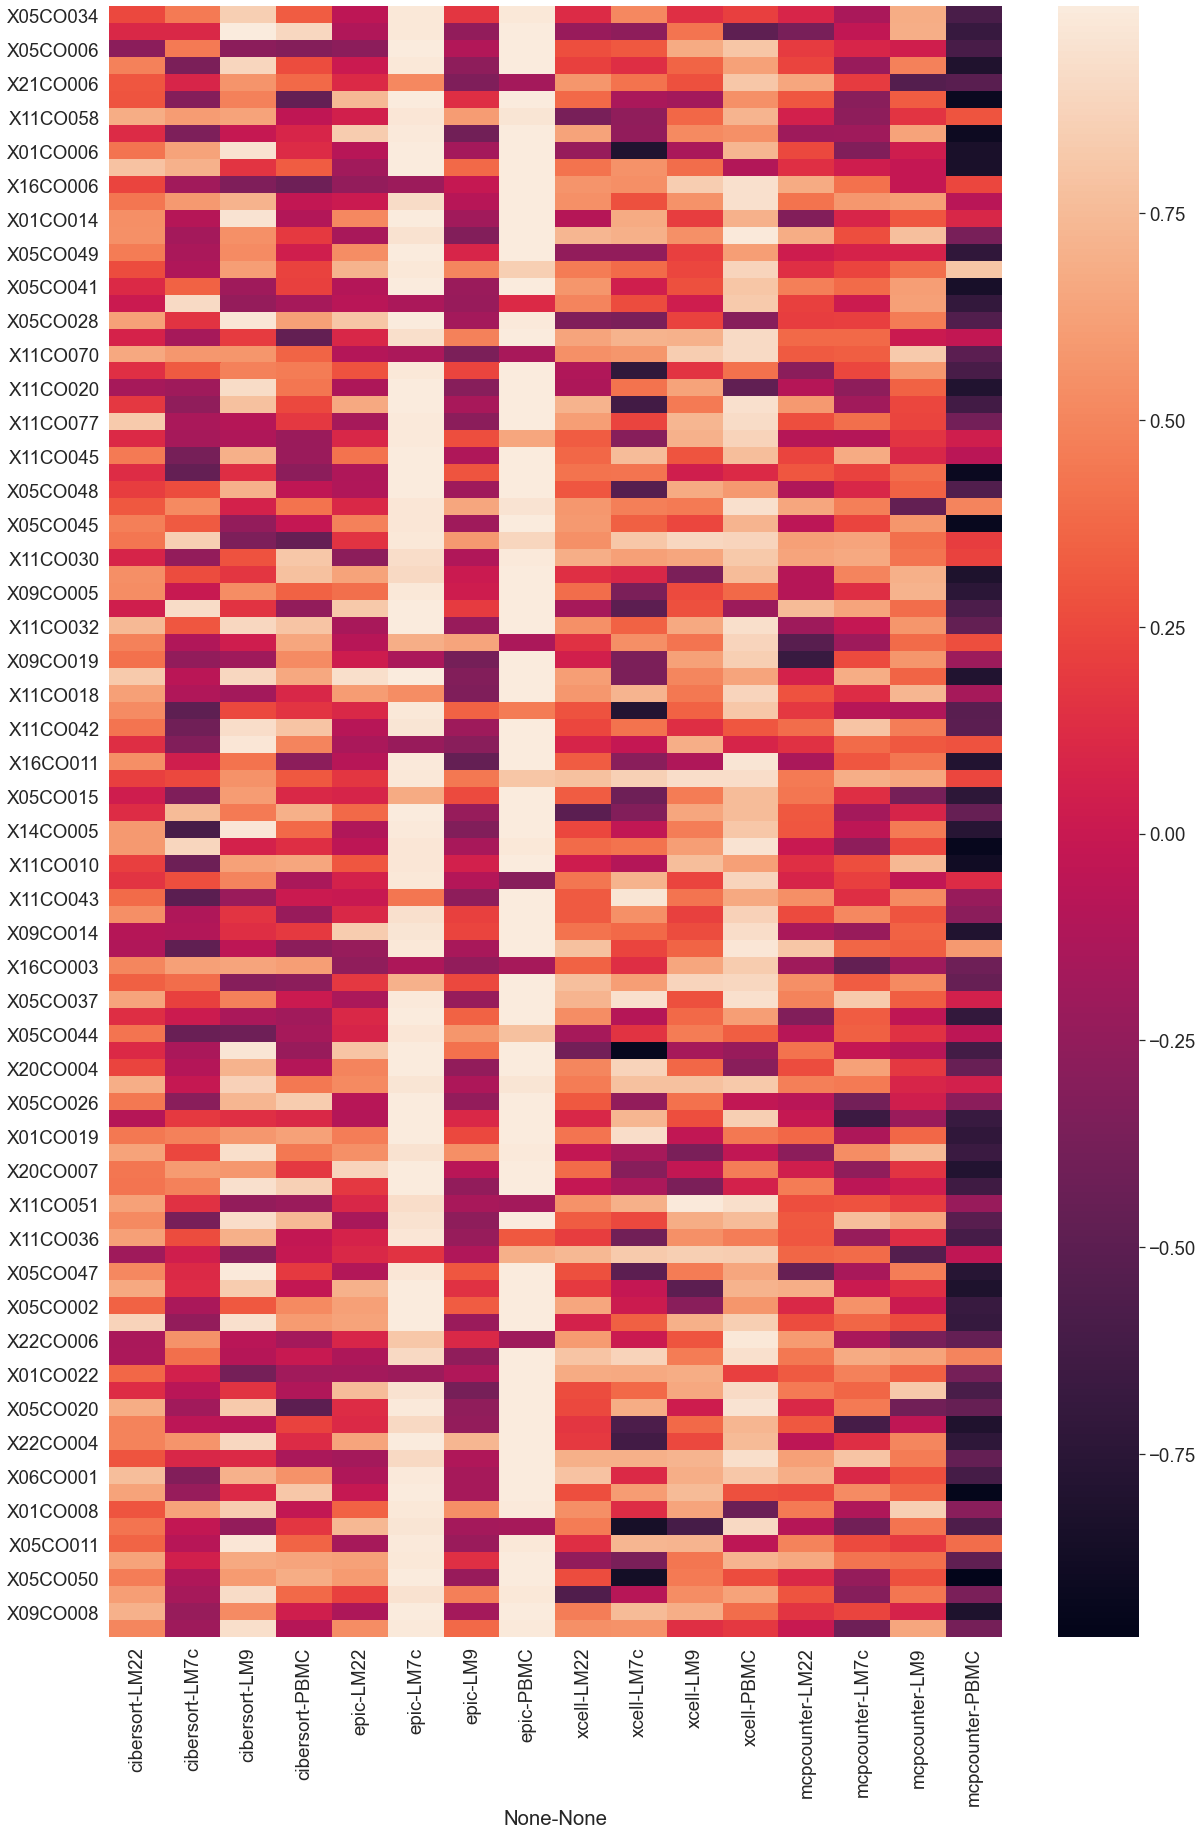

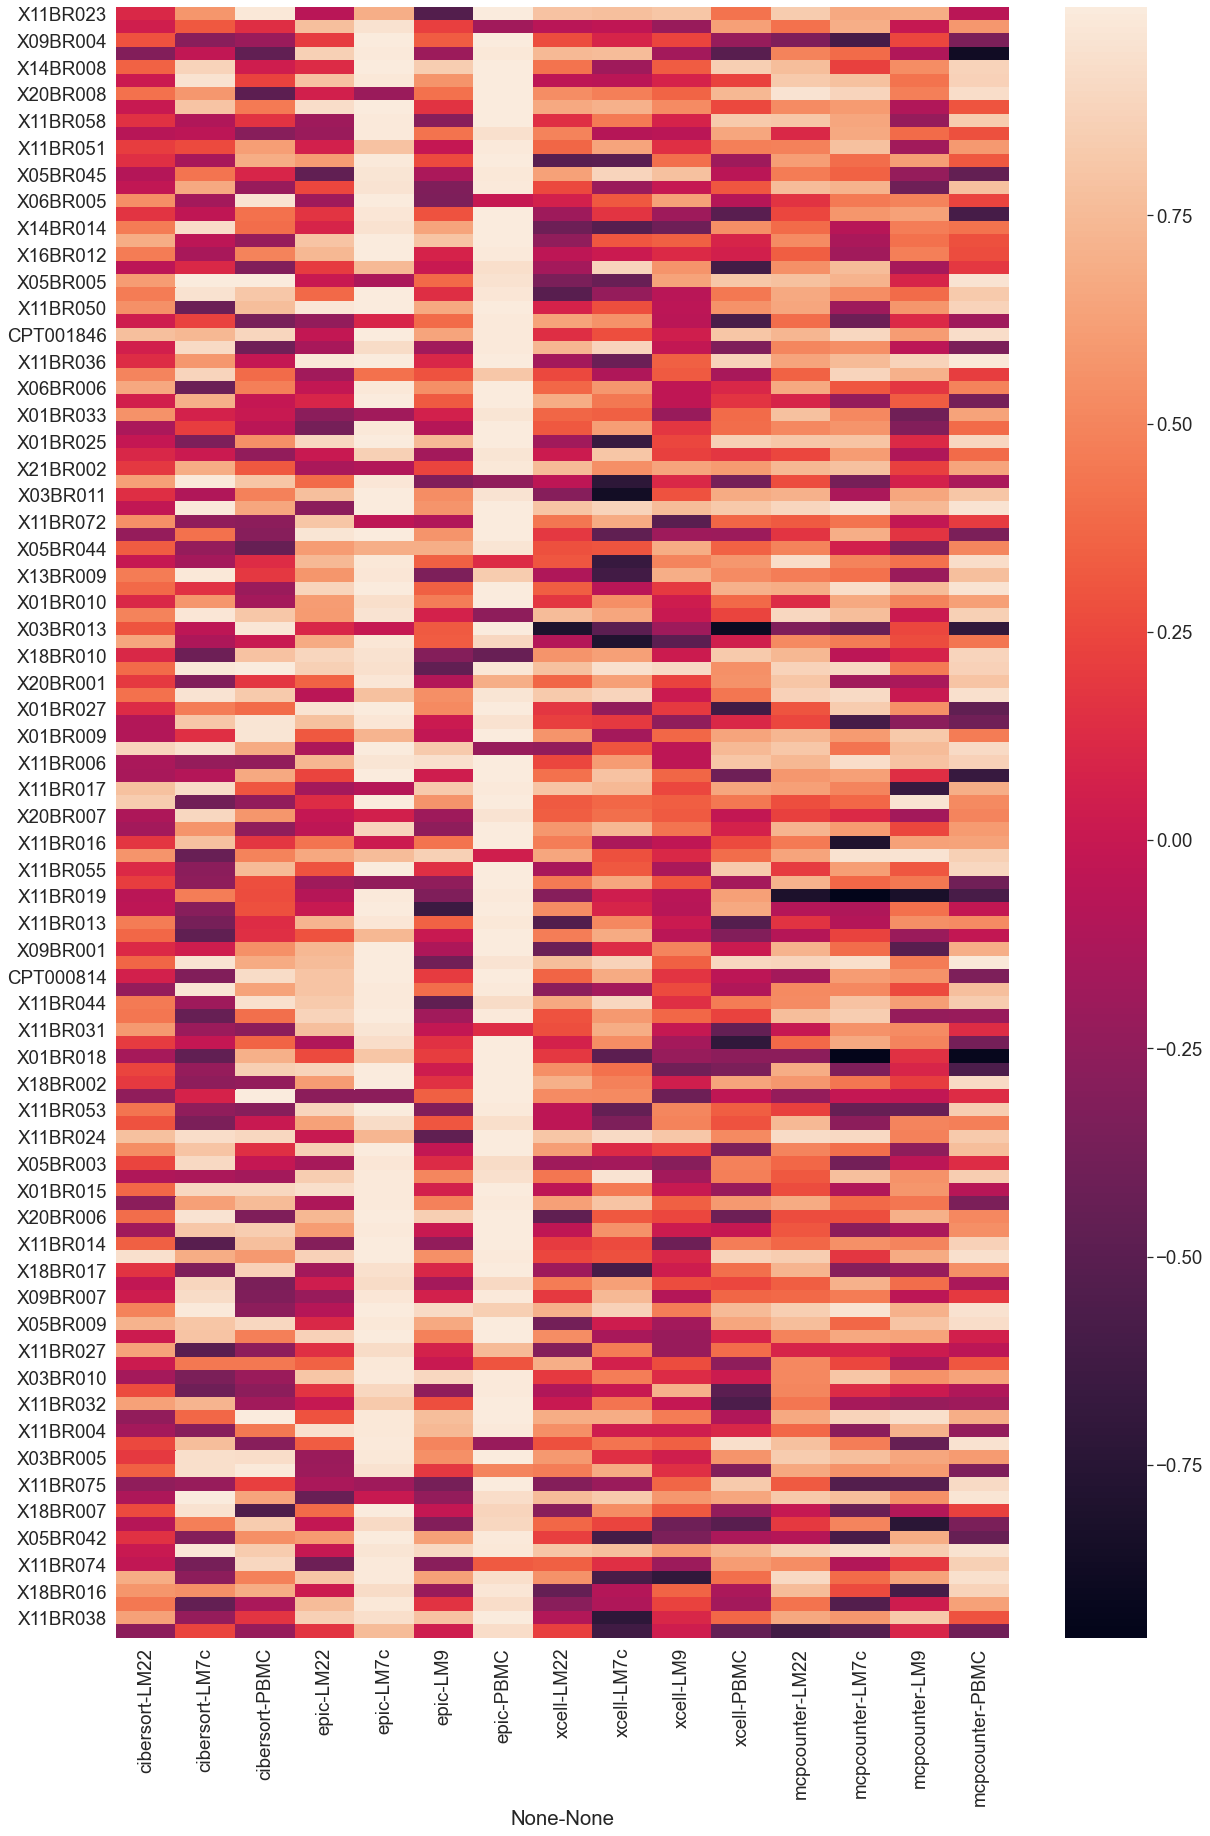

In [39]:
compareSigCorr = []
for cancer in cancerTypes:
    table0 = []
    for algo in algorithms:
        table1 = []
        colNames = []
        for sig in sigMatrices:
            try:
                file = cancer + '-' + algo + '-' + sig + '-corr.tsv'
                corr = pd.read_csv(file, delimiter = '\t', header = None, index_col = 0)
                corr.index = [i.replace('-', '.') for i in list(corr.index)]
                corr.name = sig
                table1.append(corr)
                colNames.append(sig)
            except:
                print(algo + " does not work with " + cancer + " using " + sig)
        df = pd.concat(table1, axis = 1)
        #df.columns = colNames
        df.columns = pd.MultiIndex.from_product([[algo], colNames])
        table0.append(df)
    dfmi = pd.concat(table0, axis = 1)
    plt.figure()
    hmap = sns.heatmap(dfmi)
    fig = hmap.get_figure()
    fig.savefig(cancer + '-heatmap-corr.pdf', dpi=400)
    compareSigCorr.append(dfmi)

cibersort does not work with brca using LM9


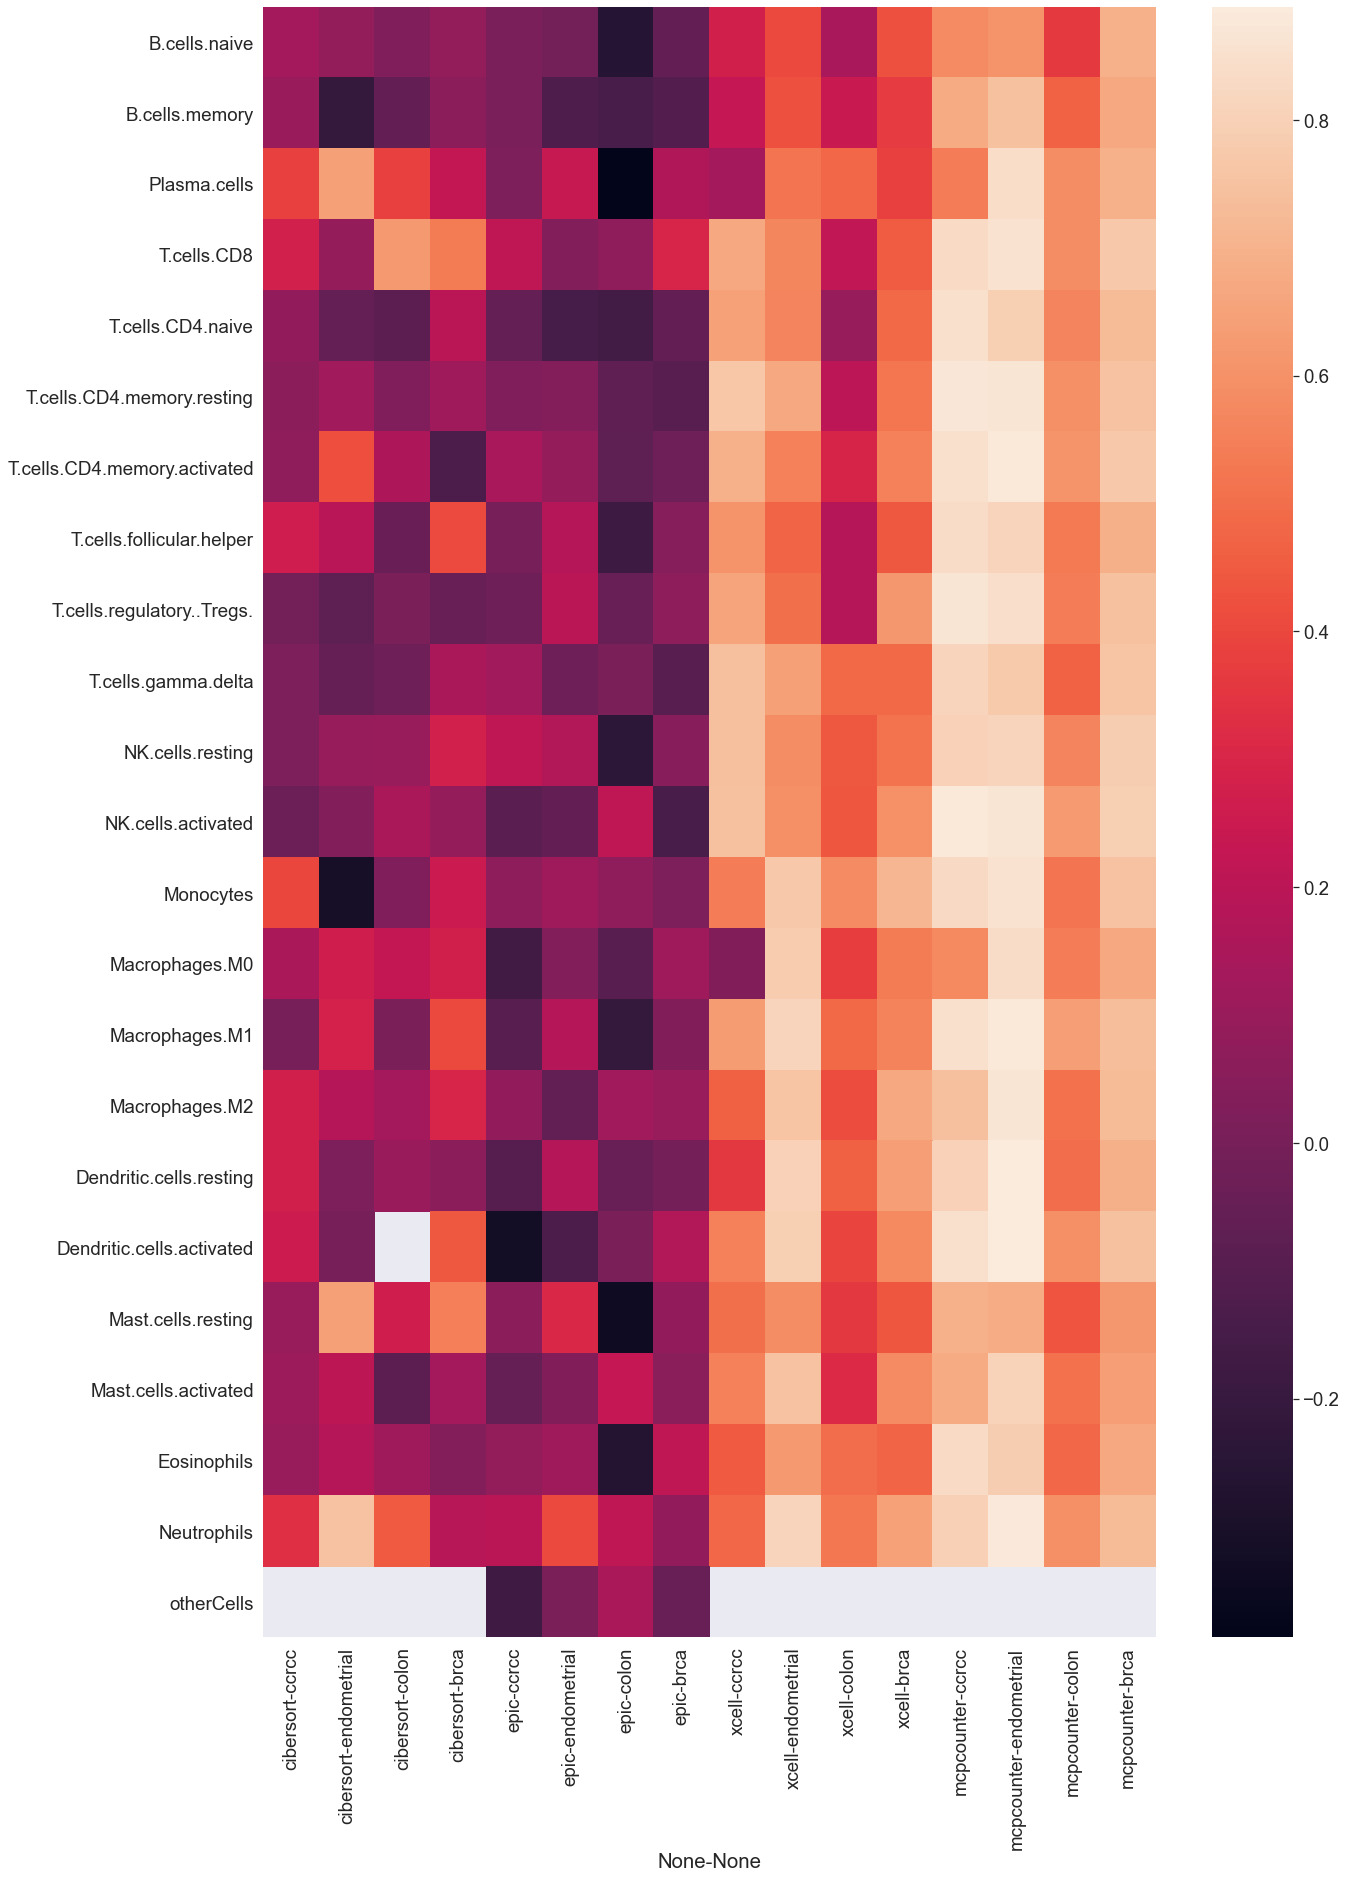

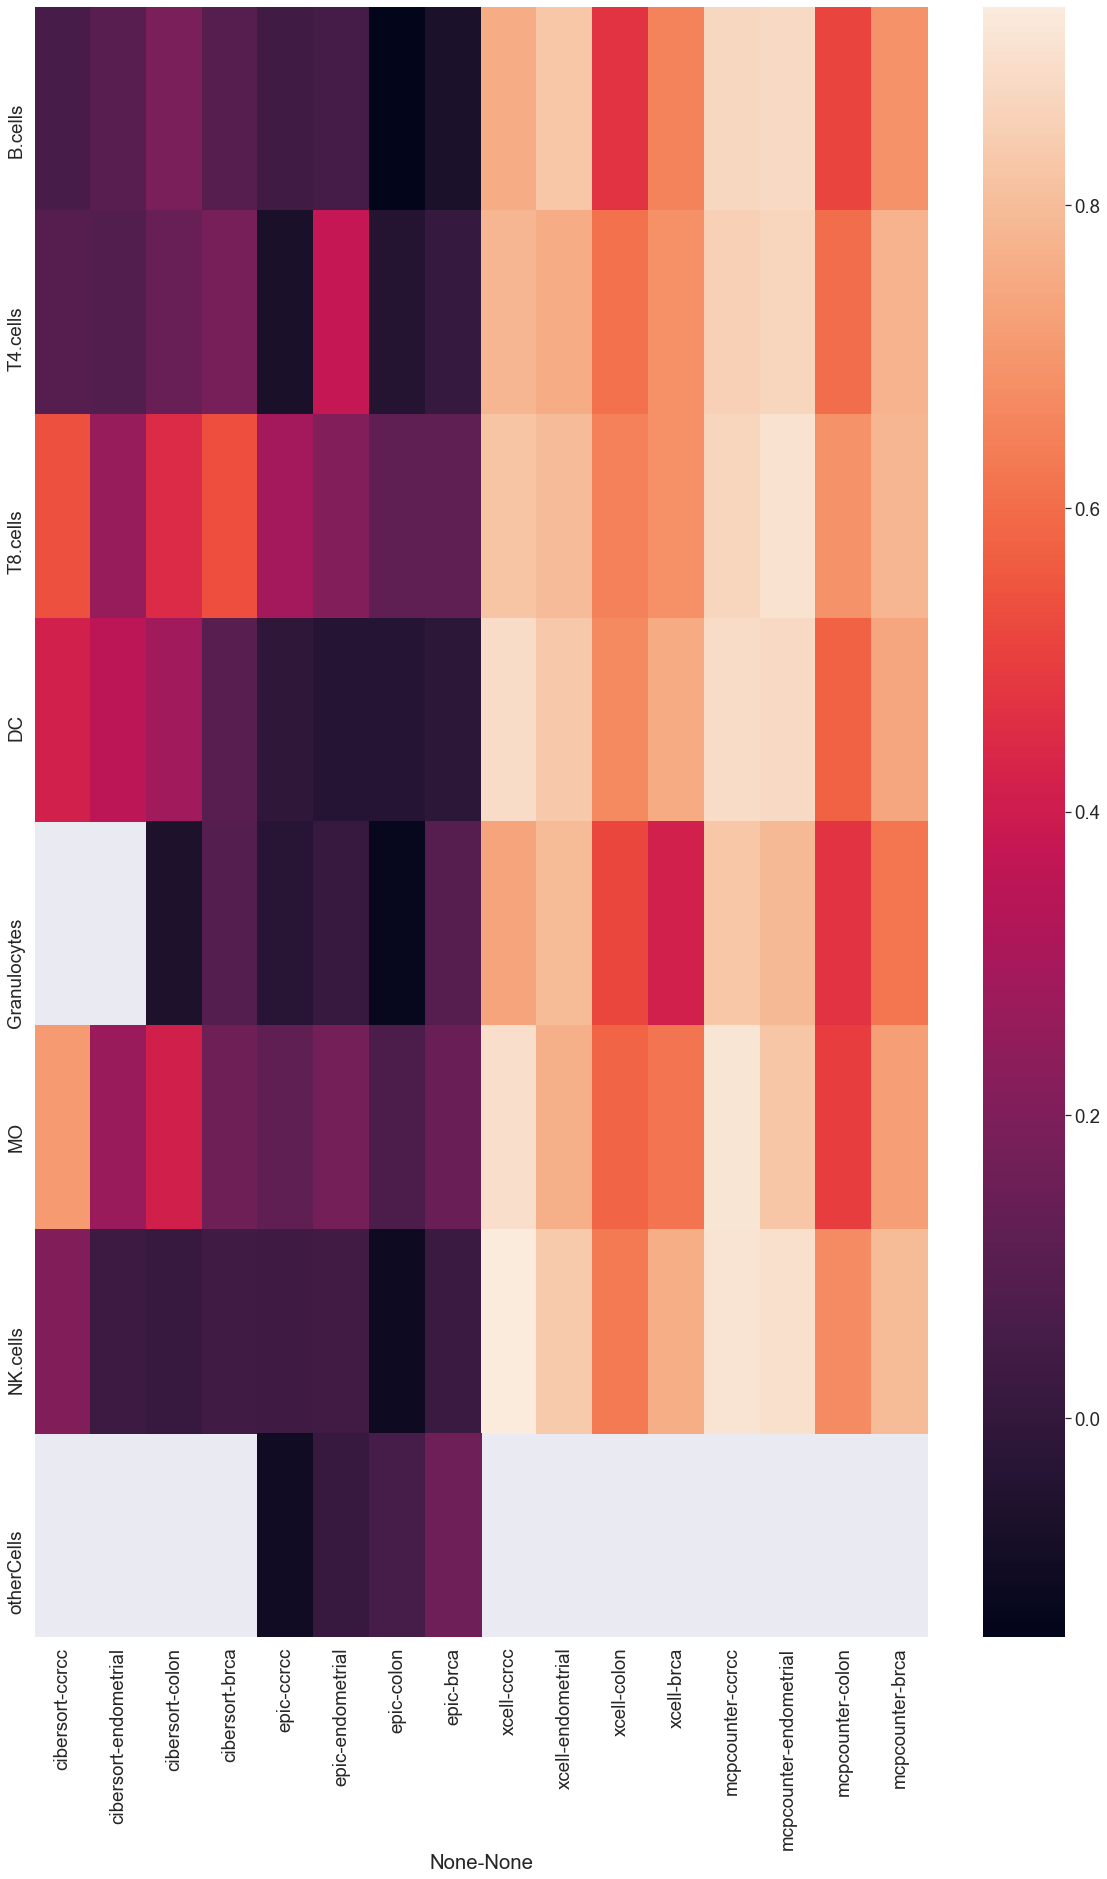

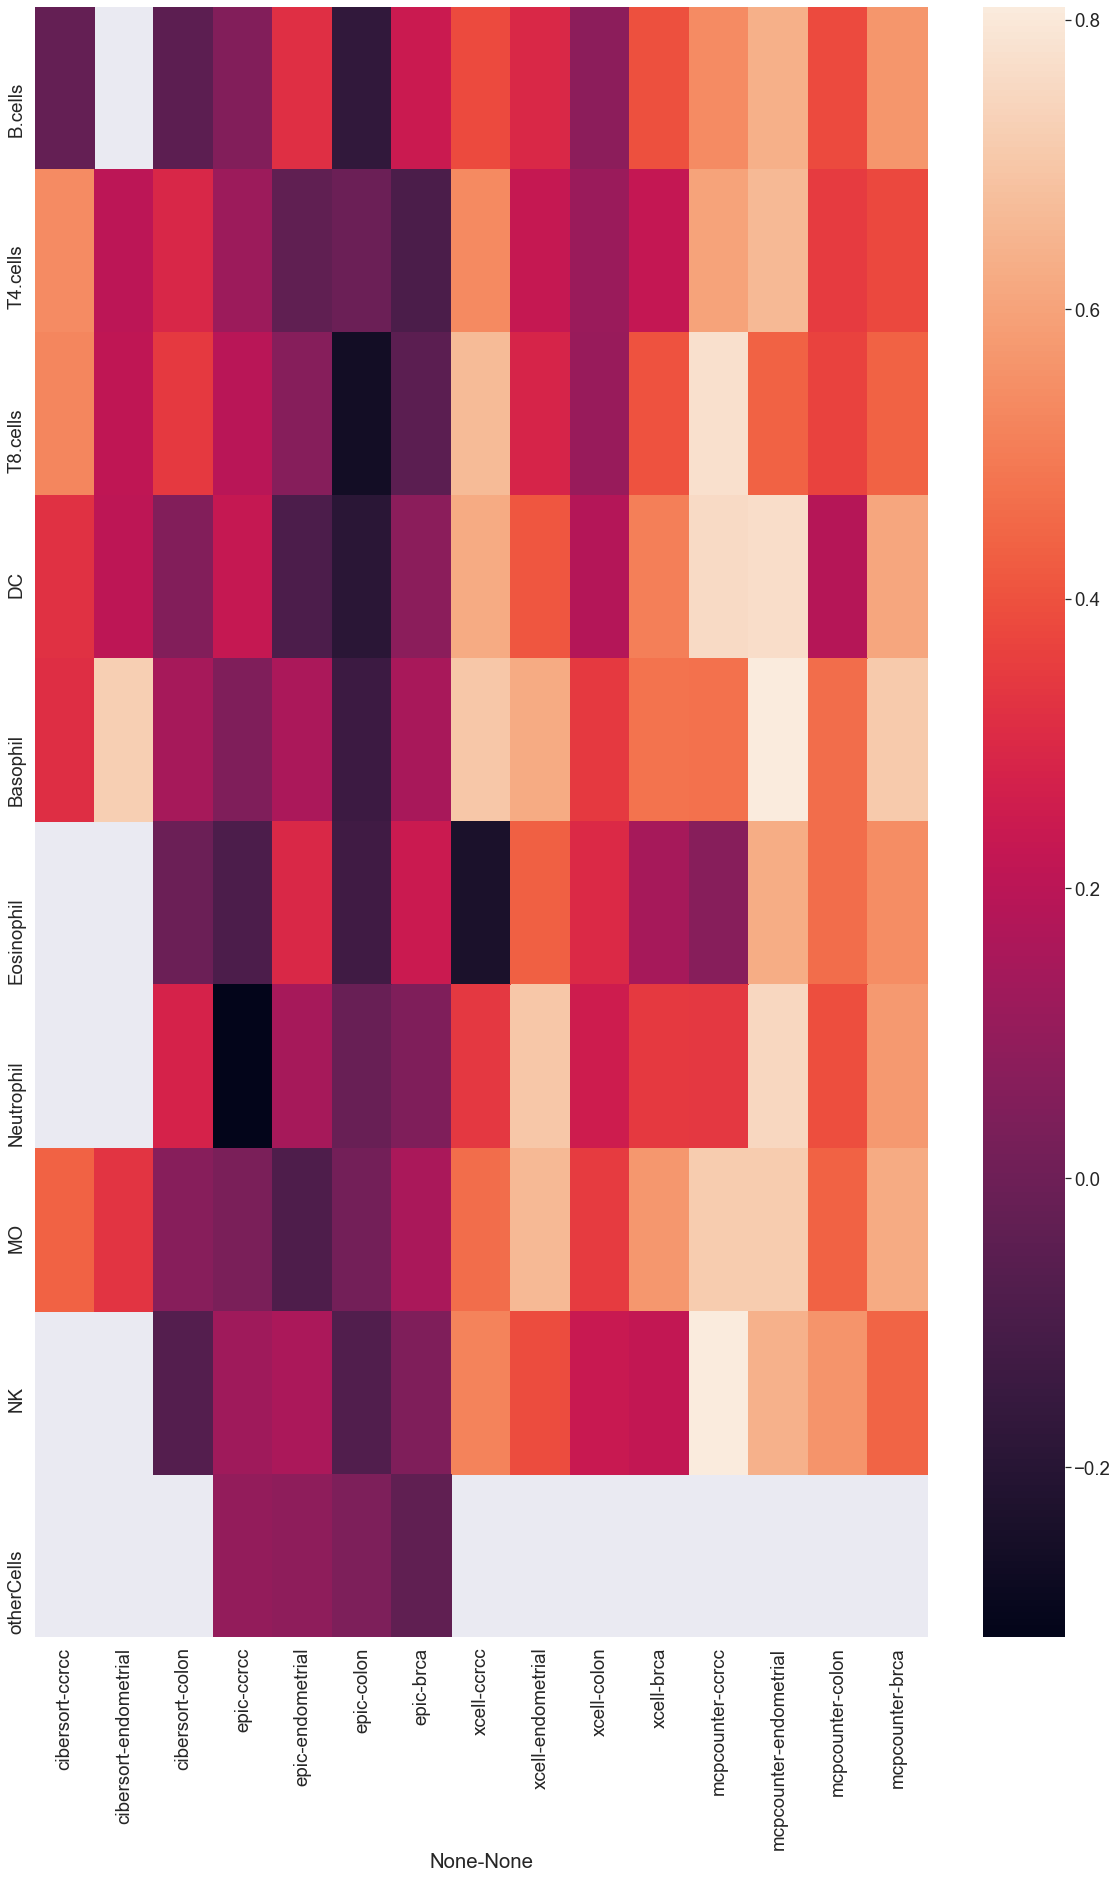

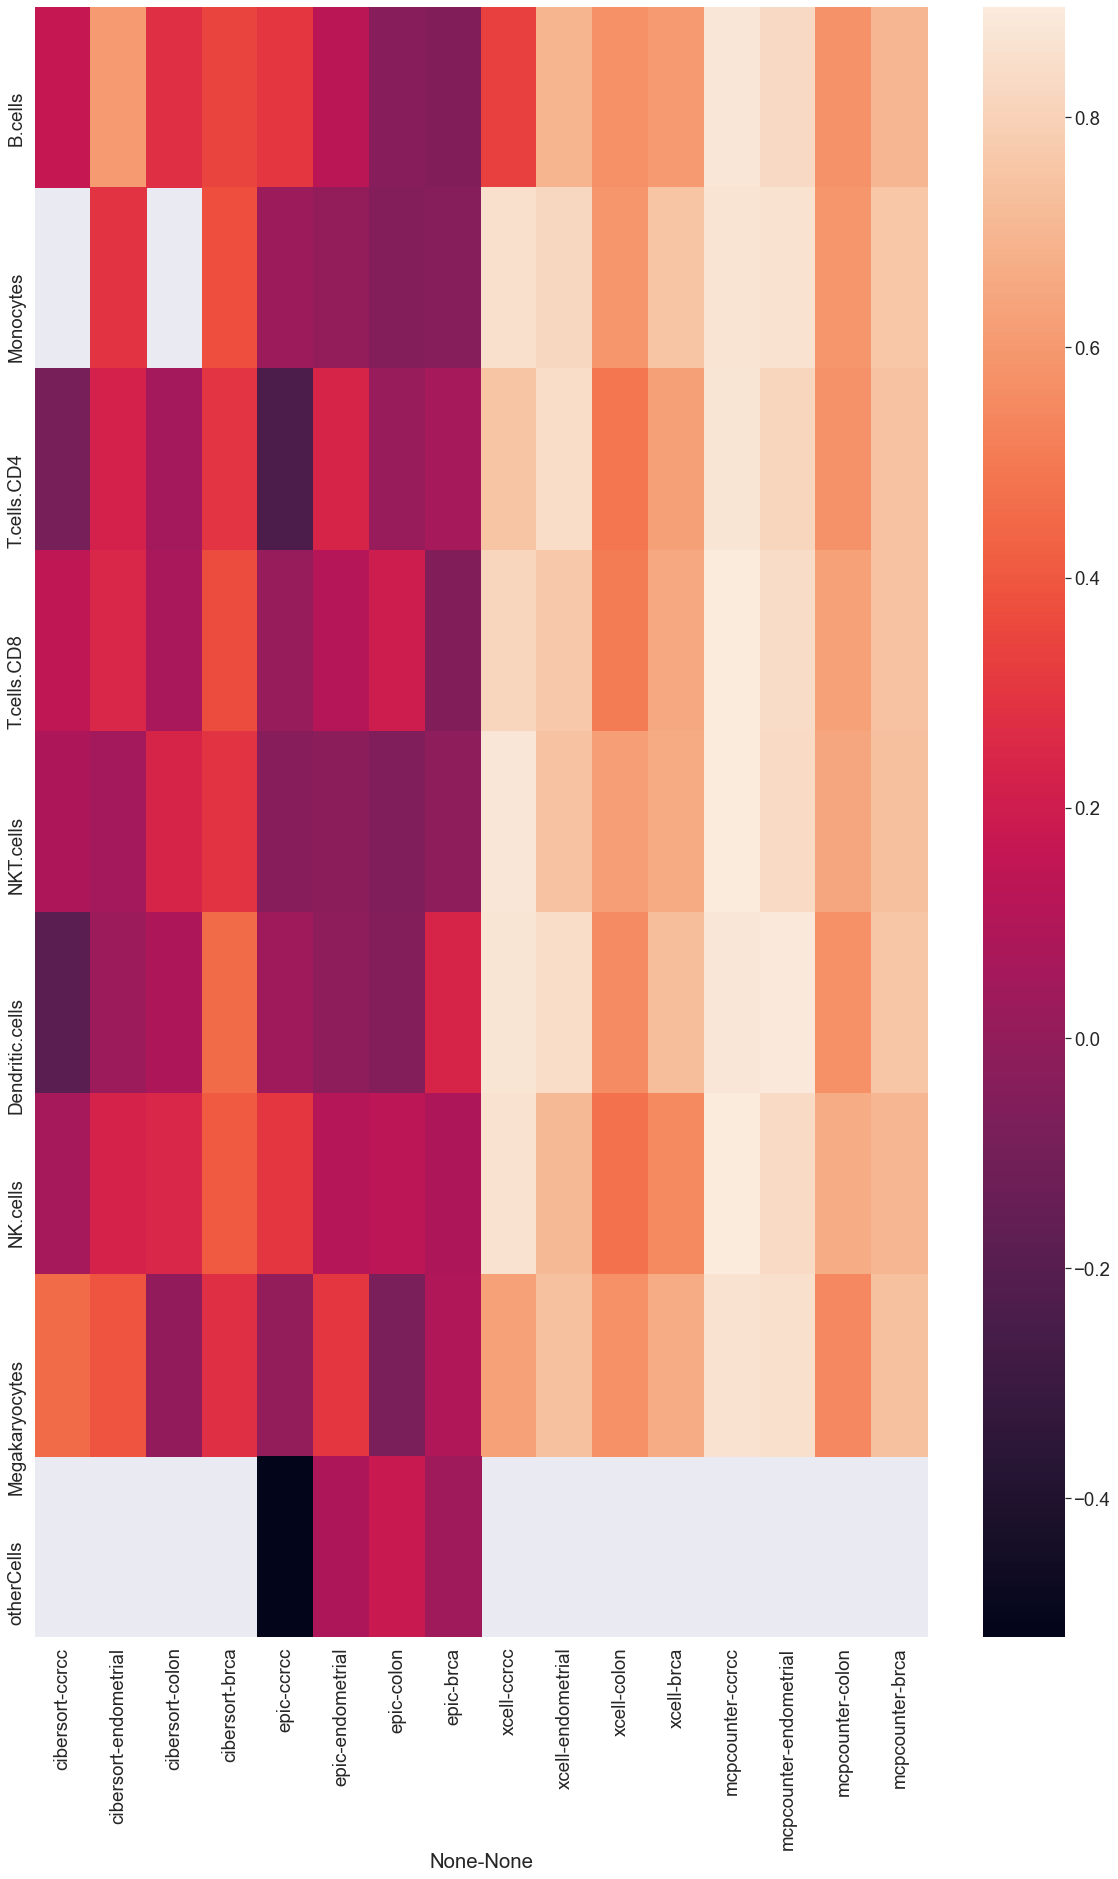

In [40]:
compareCancerCorr = []
for sig in sigMatrices:
    table0 = []
    for algo in algorithms:
        table1 = []
        colNames = []
        for cancer in cancerTypes:
            try:
                file = cancer + '-' + algo + '-' + sig + '-corrXcelltypes.tsv'
                corr = pd.read_csv(file, delimiter = '\t', header = None, index_col = 0)
                corr.index = [i.replace('-', '.') for i in list(corr.index)]
                corr.name = sig
                table1.append(corr)
                colNames.append(cancer)
            except:
                print(algo + " does not work with " + cancer + " using " + sig)
        df = pd.concat(table1, axis = 1)
        #df.columns = colNames
        df.columns = pd.MultiIndex.from_product([[algo], colNames])
        table0.append(df)
    dfmi = pd.concat(table0, axis = 1)
    plt.figure()
    hmap = sns.heatmap(dfmi)
    fig = hmap.get_figure()
    fig.savefig(sig + '-heatmap-corrXcelltypes.pdf', dpi=400)
    compareSigCorr.append(dfmi)